**Author : Riadul Islam Rabbi**

<h1><center> Hyundai Car Price Prediction Using Linear Regression</center></h1>

### Hyundai Car Dataset From Kaggle
-------------------------------------------------------------------------------------------------------------------------------

##Importing Libraries

In [95]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# to generate clear images
sns.set_context('talk')


## Load the Hyundai Dataset

In [107]:
df_hyundai_data = pd.read_csv("https://raw.githubusercontent.com/SKawsar/Data_Visualization_with_Python/main/hyundai.csv")

In [108]:
display(df_hyundai_data.head(10))

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,I20,2017,7999,Manual,17307,Petrol,58.9,1.2
1,Tucson,2016,14499,Automatic,25233,Diesel,43.5,2.0
2,Tucson,2016,11399,Manual,37877,Diesel,61.7,1.7
3,I10,2016,6499,Manual,23789,Petrol,60.1,1.0
4,IX35,2015,10199,Manual,33177,Diesel,51.4,2.0
5,I10,2015,6149,Manual,41650,Petrol,60.1,1.0
6,I20,2015,6799,Manual,39547,Petrol,55.4,1.2
7,Tucson,2016,14199,Automatic,30300,Diesel,57.6,1.7
8,I30,2018,10399,Automatic,38082,Petrol,51.4,1.4
9,Tucson,2016,12163,Manual,21014,Diesel,61.7,1.7


In [32]:
df_hyundai_data.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'mpg',
       'engineSize'],
      dtype='object')

In [33]:
df_hyundai_data.shape

(4860, 8)

In [82]:
df_hyundai_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         4860 non-null   object 
 1   year          4860 non-null   int64  
 2   price         4860 non-null   int64  
 3   transmission  4860 non-null   object 
 4   mileage       4860 non-null   int64  
 5   fuelType      4860 non-null   object 
 6   mpg           4860 non-null   float64
 7   engineSize    4860 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 303.9+ KB


In [35]:
df_hyundai_data.describe()

,year,price,mileage,mpg,engineSize
count,4860.000000,4860.00000,4860.000000,4860.000000,4860.000000
mean,2017.107613,12750.13107,21486.049588,53.827798,1.457922
std,1.920456,5992.92231,17710.196964,12.736042,0.400788
min,2000.000000,1200.00000,1.000000,1.100000,0.000000
25%,2016.000000,8000.00000,8339.250000,44.800000,1.200000
50%,2017.000000,11990.00000,17462.000000,55.400000,1.600000
75%,2019.000000,15733.75000,30967.000000,60.100000,1.700000
max,2020.000000,92000.00000,138000.000000,256.800000,2.900000


In [36]:
df_hyundai_data.describe(include= 'object')

,model,transmission,fuelType
count,4860,4860,4860
unique,16,4,4
top,Tucson,Manual,Petrol
freq,1300,3611,2902


#Data Preprocessing


-  One Hot Encoding
- Label Endoing

#### One Hot Encoding

At first Using `get_dummies` method for one hot encoding

In [109]:
df_hyundai_data = pd.get_dummies(df_hyundai_data, drop_first = True)

In [110]:
df_hyundai_data.head(5)

,year,price,mileage,mpg,engineSize,model_ Amica,model_ Getz,model_ I10,model_ I20,model_ I30,model_ I40,model_ I800,model_ IX20,model_ IX35,model_ Ioniq,model_ Kona,model_ Santa Fe,model_ Terracan,model_ Tucson,model_ Veloster,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,7999,17307,58.9,1.2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,2016,14499,25233,43.5,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,2016,11399,37877,61.7,1.7,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
3,2016,6499,23789,60.1,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,2015,10199,33177,51.4,2.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [39]:
df_hyundai_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    4860 non-null   int64  
 1   price                   4860 non-null   int64  
 2   mileage                 4860 non-null   int64  
 3   mpg                     4860 non-null   float64
 4   engineSize              4860 non-null   float64
 5   model_ Amica            4860 non-null   uint8  
 6   model_ Getz             4860 non-null   uint8  
 7   model_ I10              4860 non-null   uint8  
 8   model_ I20              4860 non-null   uint8  
 9   model_ I30              4860 non-null   uint8  
 10  model_ I40              4860 non-null   uint8  
 11  model_ I800             4860 non-null   uint8  
 12  model_ IX20             4860 non-null   uint8  
 13  model_ IX35             4860 non-null   uint8  
 14  model_ Ioniq            4860 non-null   

### Label Encoding

In [83]:
le = LabelEncoder()
for col in df_hyundai_data:
  if df_hyundai_data[col].dtypes ==  'object':
    df_hyundai_data[col] = le.fit_transform(df_hyundai_data[col])

df_hyundai_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         4860 non-null   int64  
 1   year          4860 non-null   int64  
 2   price         4860 non-null   int64  
 3   transmission  4860 non-null   int64  
 4   mileage       4860 non-null   int64  
 5   fuelType      4860 non-null   int64  
 6   mpg           4860 non-null   float64
 7   engineSize    4860 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 303.9 KB


# Separate the input features, and target variable

In [111]:
X = df_hyundai_data.drop(["price"], axis = 1) # Input features
y = df_hyundai_data[["price"]] # target value

In [112]:
#X.head(5)
print(X.shape)
print(y.shape)

(4860, 25)
(4860, 1)


In [62]:
y.head()

,price
0,7999
1,14499
2,11399
3,6499
4,10199


# Split the train and test set

In [113]:
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size = 0.2, random_state = 102)
print("X_train : ", X_train.shape)
print("X_test  : ", X_test.shape)
print("y_train : ", y_train.shape)
print("y_test  : ", y_test.shape)

X_train :  (3888, 25)
X_test  :  (972, 25)
y_train :  (3888, 1)
y_test  :  (972, 1)


In [64]:
y_test.head()

,price
825,13485
4211,7795
1782,19894
3450,25000
196,15498


## Model Linear Regression

In [114]:
le = LinearRegression()
le.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [115]:
y_pred = le.predict(X_test)
y_pred[0:10]

array([[13929.30788707],
       [ 8061.78547674],
       [18078.21298699],
       [18336.66822744],
       [17623.10557045],
       [18532.21343596],
       [11411.64460568],
       [13683.62208796],
       [15043.37340046],
       [ 7206.46387346]])

In [67]:
y_test[0:10]

,price
825,13485
4211,7795
1782,19894
3450,25000
196,15498
2862,23995
2175,9989
4117,10495
261,14698
1616,6290


#Difference between actual and predicted price

In [69]:
#hyundai_dif_price_data = pd.DataFrame({'Actual Data': y_test, 'Predicted Price' : y_pred, 'Difference Price': (y_pred - y_test)})
#hyundai_dif_price_data.head()

<h4>Show the <b>coefficients</b> of your linear regression model for each feature and show the <b>y-intercept</b> value of your linear regression model.</4>

- One Hot Encoding

In [116]:
coefficients = pd.DataFrame({"Features" : X.columns , "Coefficients" : np.squeeze(le.coef_)})
coefficients = coefficients.sort_values(by = 'Coefficients')
display(coefficients)

,Features,Coefficients
6,model_ I10,-9022.831557
11,model_ IX20,-8856.963556
7,model_ I20,-8043.188098
10,model_ I800,-7537.359678
13,model_ Ioniq,-7130.500608
18,model_ Veloster,-6272.056369
12,model_ IX35,-6225.044994
9,model_ I40,-6152.875723
8,model_ I30,-5812.438994
4,model_ Amica,-4874.447699


In [117]:
print("Intercept value : ", le.intercept_)

Intercept value :  [-1970754.73062685]


## Label Encoding

In [103]:
coefficients = pd.DataFrame({"Features" : X.columns , "Coefficients" : np.squeeze(le.coef_)})
coefficients = coefficients.sort_values(by = 'Coefficients')
display(coefficients)

,Features,Coefficients
4,fuelType,-476.672539
5,mpg,-50.860496
3,mileage,-0.086049
0,model,356.758936
2,transmission,579.228562
1,year,1101.621269
6,engineSize,4962.368237


In [104]:
print("Intercept value : ", le.intercept_)

Intercept value :  [-2214669.05614178]


#Evaluation

Find the `MAE`, `MAPE`, `MSE`, `RMSE`, `coefficient of determination ` values from the actual target variable and the predicted target variable.

- Evaluation after using one hot encoding

In [118]:
# mean absolute error
MAE = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error = ", MAE)

# mean squared error
MSE = mean_squared_error(y_test, y_pred)
print("Mean Squared Error = ", MSE)

# root mean squared error
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error = ", RMSE)

# coefficient of determination
r_squared = r2_score(y_test, y_pred) 
print("Coefficient of Determination = ", r_squared)

Mean Absolute Error =  1513.938103397633
Mean Squared Error =  4641886.3446117975
Root Mean Squared Error =  2154.5037351120554
Coefficient of Determination =  0.8649294195279986


In [119]:
def MAPE(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("Mean Absolute Percentage error : ", MAPE(y_test, y_pred))

Mean Absolute Percentage error :  14.211885292602123


###Compare the actual and predicted target variable through visualization

In [58]:
y_test['predicted_vale'] = y_pred
display(y_test.head(10))

825     13485
4211     7795
1782    19894
3450    25000
196     15498
2862    23995
2175     9989
4117    10495
261     14698
1616     6290
Name: price, dtype: object

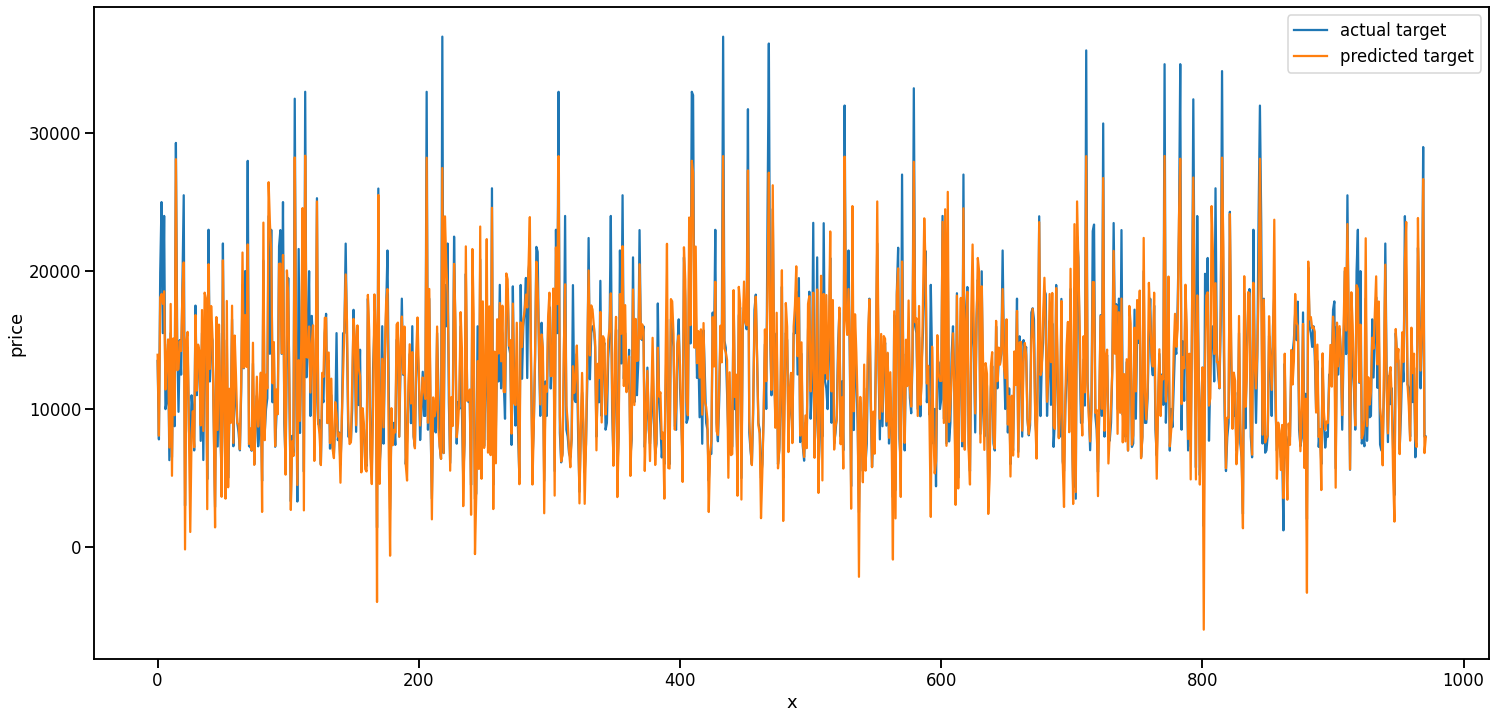

In [74]:
y_test['pred'] = y_pred
y_test['x'] = np.arange(0,y_test.shape[0],1).tolist()

plt.figure(figsize=(25,12))

sns.lineplot(x='x', y='price', data=y_test, label='actual target')
sns.lineplot(x='x', y='pred', data=y_test, label='predicted target')
plt.show()

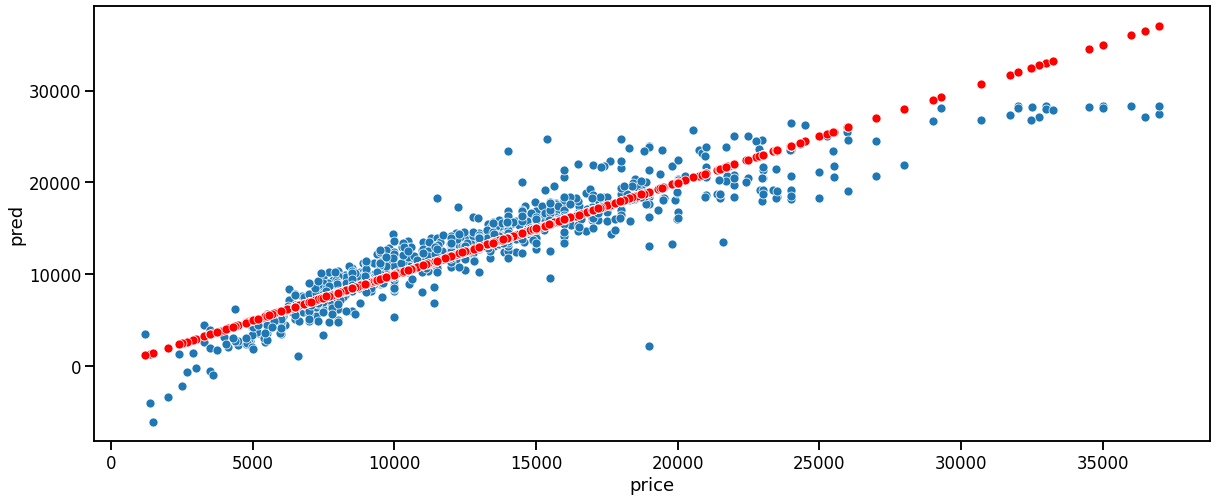

In [77]:
plt.figure(figsize=(20,8))

sns.scatterplot(x='price', y='pred', data=y_test)

sns.scatterplot(x='price', y='price', data=y_test, color='red')
plt.show()

#### Find the MAE, MAPE, MSE, RMSE, coefficient of determination values from the actual target variable and the predicted target variable.

##Evaluation after using Label encoding

In [105]:
# mean absolute error
MAE = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error = ", MAE)

# mean squared error
MSE = mean_squared_error(y_test, y_pred)
print("Mean Squared Error = ", MSE)

# root mean squared error
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error = ", RMSE)

# coefficient of determination
r_squared = r2_score(y_test, y_pred) 
print("Coefficient of Determination = ", r_squared)

Mean Absolute Error =  2135.7828598846418
Mean Squared Error =  8448548.319925347
Root Mean Squared Error =  2906.638663460828
Coefficient of Determination =  0.754162372578835


In [106]:
def MAPE(y_true, y_pred): 
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / np.maximum(np.ones(len(y_true)), np.abs(y_true))))*100

print("Mean Absolute Percentage error : ", MAPE(y_test, y_pred))

Mean Absolute Percentage error :  20.300105919396632


###Compare the actual and predicted target variable through visualization
<b> Label Encoding</b>

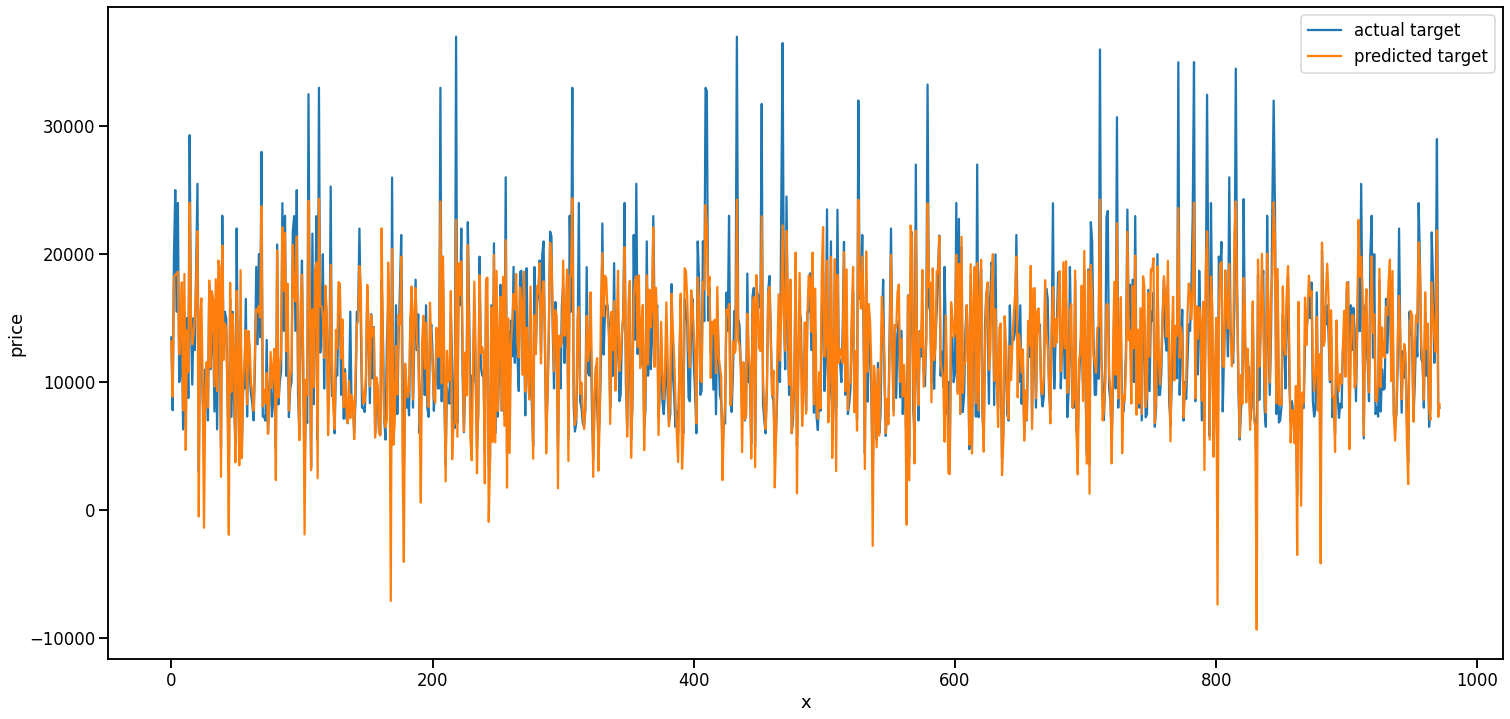

In [93]:
y_test['pred'] = y_pred
y_test['x'] = np.arange(0,y_test.shape[0],1).tolist()

plt.figure(figsize=(25,12))

sns.lineplot(x='x', y='price', data=y_test, label='actual target')
sns.lineplot(x='x', y='pred', data=y_test, label='predicted target')
plt.show()

# Label Encoding or One-hot Encoding (Explain which one is best suitable for your analysis)

- Label Encoding is a popular encoding technique for handling categorical variables. In this technique, each label is assigned a unique integer based on alphabetical ordering.

- One-Hot Encoding is another popular technique for treating categorical variables. It simply creates additional features based on the number of unique values in the categorical feature. Every unique value in the category will be added as a feature.

We apply One-Hot Encoding when:

- The categorical feature is not ordinal (like the countries above)
- The number of categorical features is less so one-hot encoding can be effectively applied

We apply Label Encoding when:

- The categorical feature is ordinal (like Jr. kg, Sr. kg, Primary school, high school)
- The number of categories is quite large as one-hot encoding can lead to high memory consumption
 

But in this analysis, One Hot Encoding gives better accuracy than label encoding. So it suitable for this analysis.